# Motor Imagery EEG
##### Creating MNE Raw objects from Matlab Files

In [1]:
import mne


## EEG Data

In [2]:
#Save all of the filenames in an array

filenames = [r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 01\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 02\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 03\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 04\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 05\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 06\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 07\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 08\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 09\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 10\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 11\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 12\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 13\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 14\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 15\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 16\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 17\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 18\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 19\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 20\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 21\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 22\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 23\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 24\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 25\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 26\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 27\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 28\with occular artifact\cnt.mat",
             r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 29\with occular artifact\cnt.mat"]


In [3]:
#Save the raw data in the dictionary
import numpy as np
from scipy.io import loadmat
import pandas as pd

eeg_matlab = {}

for i in range(29):
    eeg_matlab["subject{0}".format(i+1)] = loadmat(filenames[i])
    
eeg_channels = [item.flat[0] for item in eeg_matlab["subject1"]['cnt'][0][0]['clab'][0][0][0]]    

In [4]:
# Montage data

mnt = loadmat(r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 01\with occular artifact\mnt.mat")

pos_3d = mnt['mnt']['pos_3d'][0][0].T

clab = {}

for i in range(32):
    clab[mnt['mnt']['clab'][0][0][0][i][0]]=pos_3d[i]
 

eeg_mnt = mne.channels.make_dig_montage(clab,coord_frame='head')

Creating RawArray with float64 data, n_channels=32, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


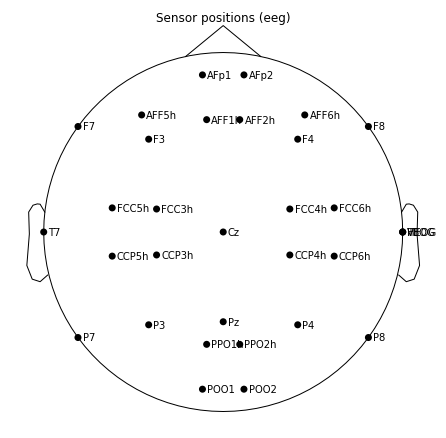

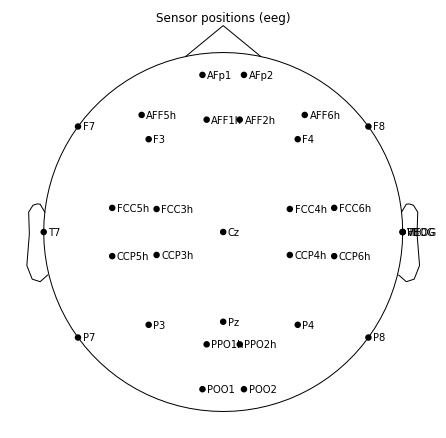

In [5]:
eeg_mnt.plot()

In [6]:
# Initialize an info structure
eeg_info = mne.create_info(
    ch_names=eeg_channels,
    ch_types=['eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eeg','eeg','eeg','eeg','eeg','eeg',
             'eog','eog'],
    sfreq=200)

eeg_info.set_montage(eeg_mnt)

<Info | 8 non-empty values
 bads: []
 ch_names: F7, AFF5h, F3, AFp1, AFp2, AFF6h, F4, F8, AFF1h, AFF2h, Cz, Pz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 200.0 Hz
>

## Create Raw objects

In [11]:
eeg_data_1 = {}
eeg_data_2 = {}
eeg_data_3 = {}
eeg_raw1 = {}
eeg_raw2 = {}
eeg_raw3 = {}

for i in range(29):
    eeg_data_1["subject{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line 
                                                       in eeg_matlab["subject{0}".format(i+1)]['cnt'][0][0]['x'][0][0]],
                                                     columns=eeg_channels)
    eeg_data_2["subject{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line 
                                                       in eeg_matlab["subject{0}".format(i+1)]['cnt'][0][2]['x'][0][0]],
                                                     columns=eeg_channels)
    eeg_data_3["subject{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line 
                                                       in eeg_matlab["subject{0}".format(i+1)]['cnt'][0][4]['x'][0][0]],
                                                     columns=eeg_channels)

    eeg_raw1["subject{0}".format(i+1)] = mne.io.RawArray((eeg_data_1["subject{0}".format(i+1)].T*0.000001), eeg_info)
    eeg_raw2["subject{0}".format(i+1)] = mne.io.RawArray((eeg_data_2["subject{0}".format(i+1)].T*0.000001), eeg_info)
    eeg_raw3["subject{0}".format(i+1)] = mne.io.RawArray((eeg_data_3["subject{0}".format(i+1)].T*0.000001), eeg_info)
    print(i+1)

Creating RawArray with float64 data, n_channels=32, n_times=120436
    Range : 0 ... 120435 =      0.000 ...   602.175 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=119236
    Range : 0 ... 119235 =      0.000 ...   596.175 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120851
    Range : 0 ... 120850 =      0.000 ...   604.250 secs
Ready.
1
Creating RawArray with float64 data, n_channels=32, n_times=120040
    Range : 0 ... 120039 =      0.000 ...   600.195 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120624
    Range : 0 ... 120623 =      0.000 ...   603.115 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120054
    Range : 0 ... 120053 =      0.000 ...   600.265 secs
Ready.
2
Creating RawArray with float64 data, n_channels=32, n_times=119446
    Range : 0 ... 119445 =      0.000 ...   597.225 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120466
    Range : 

    Range : 0 ... 119983 =      0.000 ...   599.915 secs
Ready.
21
Creating RawArray with float64 data, n_channels=32, n_times=119447
    Range : 0 ... 119446 =      0.000 ...   597.230 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120679
    Range : 0 ... 120678 =      0.000 ...   603.390 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120456
    Range : 0 ... 120455 =      0.000 ...   602.275 secs
Ready.
22
Creating RawArray with float64 data, n_channels=32, n_times=119288
    Range : 0 ... 119287 =      0.000 ...   596.435 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=118479
    Range : 0 ... 118478 =      0.000 ...   592.390 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=120047
    Range : 0 ... 120046 =      0.000 ...   600.230 secs
Ready.
23
Creating RawArray with float64 data, n_channels=32, n_times=120495
    Range : 0 ... 120494 =      0.000 ...   602.470 secs
Ready.
Creating R

In [12]:
eeg_raw1["subject1"].info

<Info | 8 non-empty values
 bads: []
 ch_names: F7, AFF5h, F3, AFp1, AFp2, AFF6h, F4, F8, AFF1h, AFF2h, Cz, Pz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 200.0 Hz
>

Effective window size : 10.240 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


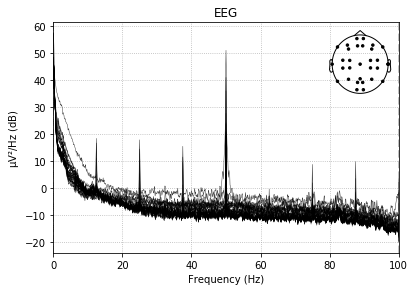

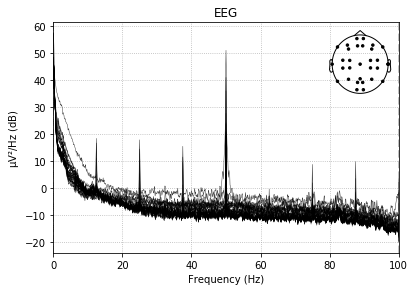

In [13]:
eeg_raw1["subject1"].plot_psd()

## Filtering Raw Data

In [14]:
filtered_raw1 = {}
filtered_raw2 = {}
filtered_raw3 = {}

#raw.filter(None, 50., fir_design='firwin')

for i in range(29):
    filtered_raw1["subject{0}".format(i+1)] = eeg_raw1["subject{0}".format(i+1)].filter(l_freq=0.5, 
                                                                                  h_freq=50, 
                                                                                  picks=None, 
                                                                                  filter_length='auto', 
                                                                                  l_trans_bandwidth='auto', 
                                                                                  h_trans_bandwidth='auto', 
                                                                                  fir_design='firwin')
    filtered_raw2["subject{0}".format(i+1)] = eeg_raw2["subject{0}".format(i+1)].filter(l_freq=0.5, 
                                                                                  h_freq=50, 
                                                                                  picks=None, 
                                                                                  filter_length='auto', 
                                                                                  l_trans_bandwidth='auto', 
                                                                                  h_trans_bandwidth='auto', 
                                                                                  fir_design='firwin')
    filtered_raw3["subject{0}".format(i+1)] = eeg_raw3["subject{0}".format(i+1)].filter(l_freq=0.5, 
                                                                                  h_freq=50, 
                                                                                  picks=None, 
                                                                                  filter_length='auto', 
                                                                                  l_trans_bandwidth='auto', 
                                                                                  h_trans_bandwidth='auto', 
                                                                                  fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband 

- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth

- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth

- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

Effective window size : 10.240 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


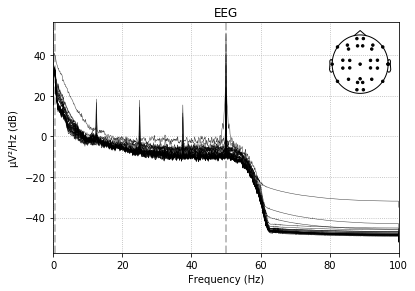

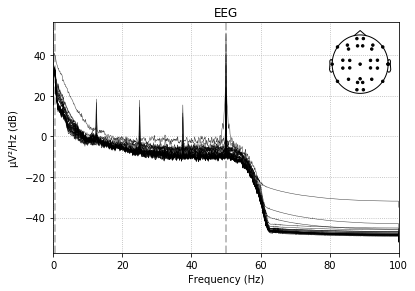

In [15]:
filtered_raw1["subject1"].plot_psd()

## Band-pass filter raw data

In [27]:
refiltered_raw1 = {}
refiltered_raw2 = {}
refiltered_raw3 = {}

for i in range(29):
    refiltered_raw1["subject{0}".format(i+1)] = filtered_raw1["subject{0}".format(i+1)].filter(l_freq=8, 
                                                                                  h_freq=25, 
                                                                                  picks=None, 
                                                                                  filter_length='auto', 
                                                                                  l_trans_bandwidth='auto', 
                                                                                  h_trans_bandwidth='auto', 
                                                                                  fir_design='firwin')
    refiltered_raw2["subject{0}".format(i+1)] = filtered_raw2["subject{0}".format(i+1)].filter(l_freq=8, 
                                                                                  h_freq=25, 
                                                                                  picks=None, 
                                                                                  filter_length='auto', 
                                                                                  l_trans_bandwidth='auto', 
                                                                                  h_trans_bandwidth='auto', 
                                                                                  fir_design='firwin')
    refiltered_raw3["subject{0}".format(i+1)] = filtered_raw3["subject{0}".format(i+1)].filter(l_freq=8, 
                                                                                  h_freq=25, 
                                                                                  picks=None, 
                                                                                  filter_length='auto', 
                                                                                  l_trans_bandwidth='auto', 
                                                                                  h_trans_bandwidth='auto', 
                                                                                  fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 

- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 sample

- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower 

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
------

Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 331 samples (1.655 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25

Effective window size : 10.240 (s)


C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
C:\Users\bio86\anaconda3\lib\site-packages\matplotlib\colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


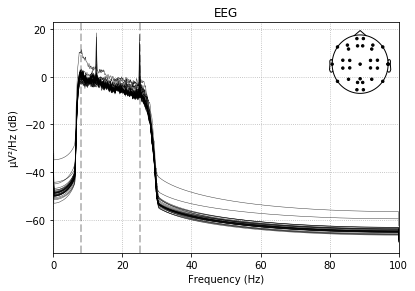

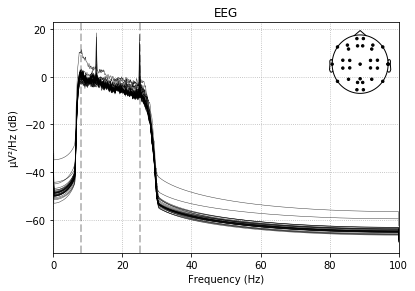

In [28]:
refiltered_raw1["subject1"].plot_psd()

## Add events to each raw object

In [29]:
#Save all of the filenames in an array

eeg_epo_filenames = [r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 01\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 02\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 03\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 04\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_01-05\subject 05\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 06\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 07\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 08\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 09\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_06-10\subject 10\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 11\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 12\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 13\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 14\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_11-15\subject 15\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 16\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 17\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 18\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 19\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_16-20\subject 20\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 21\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 22\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 23\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 24\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_21-25\subject 25\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 26\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 27\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 28\with occular artifact\mrk.mat",
                     r"D:\Dissertation\Data\Motor Imagery\EEG_26-29\subject 29\with occular artifact\mrk.mat"]

In [30]:
eeg_matlab_epochs = {}

for i in range(29):
    eeg_matlab_epochs["subject{0}".format(i+1)] = loadmat(eeg_epo_filenames[i])

In [31]:
#Events from MI task
#Put on hold

eeg_events1 = {}
eeg_events2 = {}
eeg_events3 = {}

for i in range(29):
    eeg_events1["subject{0}".format(i+1)]=np.transpose(np.vstack(
        ((eeg_matlab_epochs["subject{0}".format(i+1)]['mrk'][0][0][0][0][0][0])/5,
         np.vstack((np.zeros(20),np.transpose(eeg_matlab_epochs["subject{0}".format(i+1)]['mrk'][0][0][0][0][1][0][0][0])[0])))))
    eeg_events2["subject{0}".format(i+1)]=np.transpose(np.vstack(
        ((eeg_matlab_epochs["subject{0}".format(i+1)]['mrk'][0][2][0][0][0][0])/5,
         np.vstack((np.zeros(20),np.transpose(eeg_matlab_epochs["subject{0}".format(i+1)]['mrk'][0][2][0][0][1][0][0][0])[0])))))
    eeg_events3["subject{0}".format(i+1)]=np.transpose(np.vstack(
        ((eeg_matlab_epochs["subject{0}".format(i+1)]['mrk'][0][4][0][0][0][0])/5,
         np.vstack((np.zeros(20),np.transpose(eeg_matlab_epochs["subject{0}".format(i+1)]['mrk'][0][4][0][0][1][0][0][0])[0])))))

In [32]:
eeg_events1.keys()

dict_keys(['subject1', 'subject2', 'subject3', 'subject4', 'subject5', 'subject6', 'subject7', 'subject8', 'subject9', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15', 'subject16', 'subject17', 'subject18', 'subject19', 'subject20', 'subject21', 'subject22', 'subject23', 'subject24', 'subject25', 'subject26', 'subject27', 'subject28', 'subject29'])

In [33]:
#Information about the events
event_id = dict(S_16=16, S_32=32)

In [34]:
refiltered_raw1.keys()

dict_keys(['subject1', 'subject2', 'subject3', 'subject4', 'subject5', 'subject6', 'subject7', 'subject8', 'subject9', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15', 'subject16', 'subject17', 'subject18', 'subject19', 'subject20', 'subject21', 'subject22', 'subject23', 'subject24', 'subject25', 'subject26', 'subject27', 'subject28', 'subject29'])

In [35]:
eeg_epochs1 = {}
eeg_epochs2 = {}
eeg_epochs3 = {}

for i in range(29):
    eeg_epochs1["subject{0}".format(i+1)] = mne.Epochs(refiltered_raw1["subject{0}".format(i+1)],
                                                         eeg_events1["subject{0}".format(i+1)].astype(int),
                                                            event_id=event_id,preload=True,proj=True,tmin=-1.,tmax=4.,
                                                      picks="eeg",baseline=None)
    eeg_epochs2["subject{0}".format(i+1)] = mne.Epochs(refiltered_raw2["subject{0}".format(i+1)],
                                                         eeg_events2["subject{0}".format(i+1)].astype(int),
                                                        event_id=event_id,preload=True,proj=True,tmin=-1.,tmax=4.,
                                                      picks="eeg",baseline=None)
    eeg_epochs3["subject{0}".format(i+1)] = mne.Epochs(refiltered_raw3["subject{0}".format(i+1)],
                                                         eeg_events3["subject{0}".format(i+1)].astype(int),
                                                        event_id=event_id,preload=True,proj=True,tmin=-1.,tmax=4.,
                                                      picks="eeg",baseline=None)
    print(i+1)

20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
1
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
No

0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
15
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 events and 1001 original time points ...
0 bad epochs dropped
16
20 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 20 event

0 bad epochs dropped
29


In [36]:
#Concatenate Epochs

eeg_epochs = {}

for i in range(29):
    eeg_epochs["subject{0}".format(i+1)] = mne.concatenate_epochs((eeg_epochs1["subject{0}".format(i+1)],
                                                                   eeg_epochs2["subject{0}".format(i+1)],
                                                                   eeg_epochs3["subject{0}".format(i+1)]),
                                                                   add_offset=True)


60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped
60 matching events f

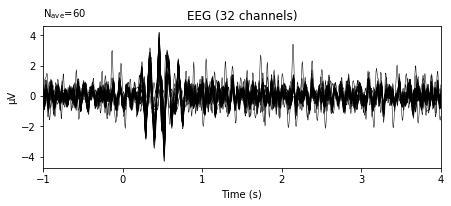

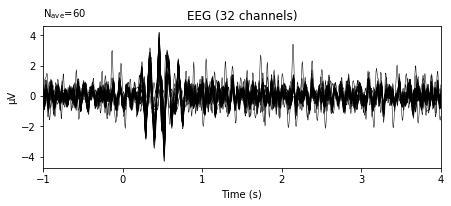

In [37]:
eeg_epochs["subject1"].average().plot(time_unit='s')

# CSP

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

In [39]:
test = {}

for i in range(29):
    test["subject{0}".format(i+1)] = eeg_epochs["subject{0}".format(i+1)].copy().drop_channels(['VEOG','HEOG'])

    Using multitaper spectrum estimation with 7 DPSS windows


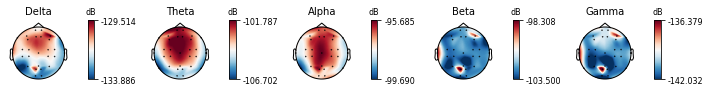

    Using multitaper spectrum estimation with 7 DPSS windows


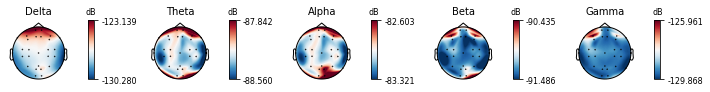

    Using multitaper spectrum estimation with 7 DPSS windows


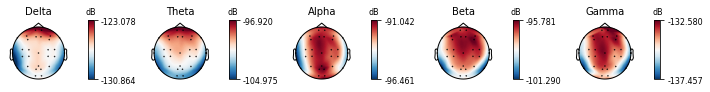

    Using multitaper spectrum estimation with 7 DPSS windows


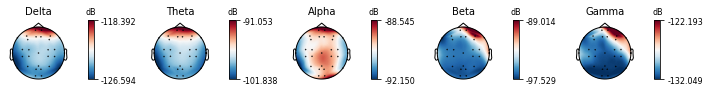

    Using multitaper spectrum estimation with 7 DPSS windows


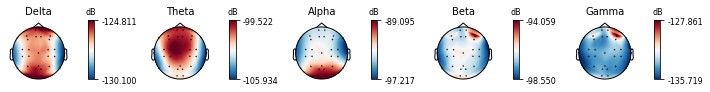

    Using multitaper spectrum estimation with 7 DPSS windows


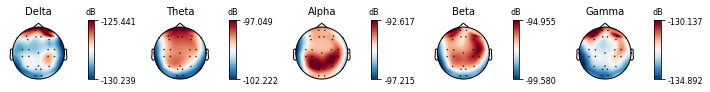

    Using multitaper spectrum estimation with 7 DPSS windows


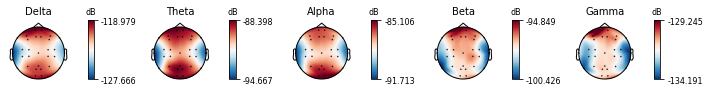

    Using multitaper spectrum estimation with 7 DPSS windows


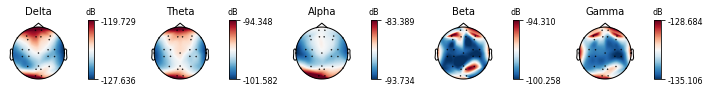

    Using multitaper spectrum estimation with 7 DPSS windows


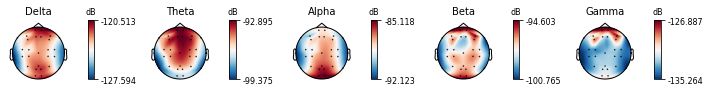

    Using multitaper spectrum estimation with 7 DPSS windows


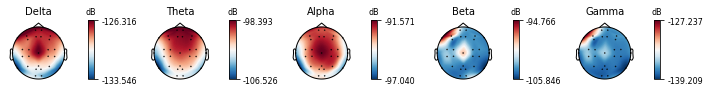

    Using multitaper spectrum estimation with 7 DPSS windows


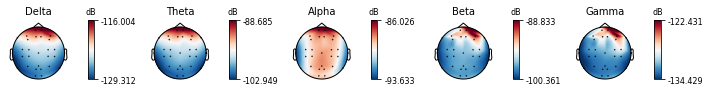

    Using multitaper spectrum estimation with 7 DPSS windows


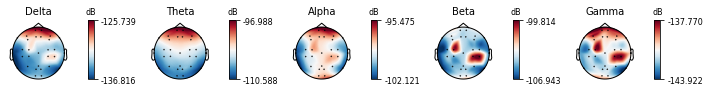

    Using multitaper spectrum estimation with 7 DPSS windows


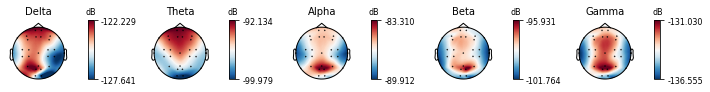

    Using multitaper spectrum estimation with 7 DPSS windows


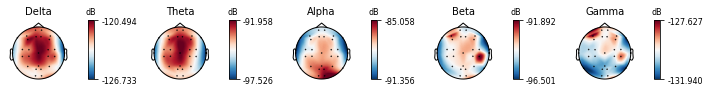

    Using multitaper spectrum estimation with 7 DPSS windows


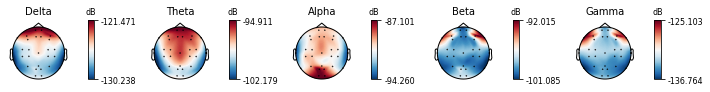

    Using multitaper spectrum estimation with 7 DPSS windows


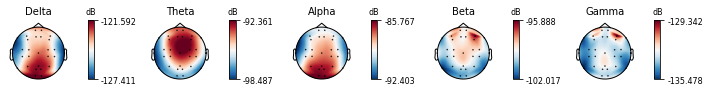

    Using multitaper spectrum estimation with 7 DPSS windows


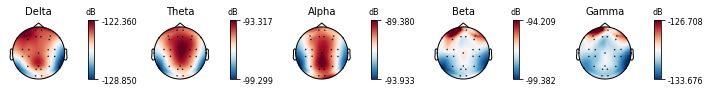

    Using multitaper spectrum estimation with 7 DPSS windows


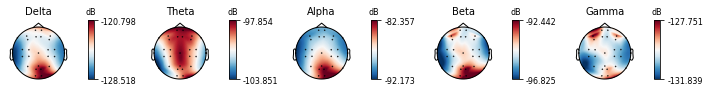

    Using multitaper spectrum estimation with 7 DPSS windows


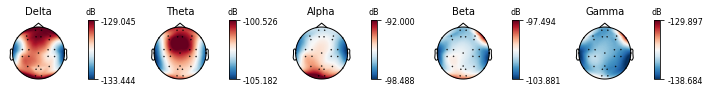

    Using multitaper spectrum estimation with 7 DPSS windows


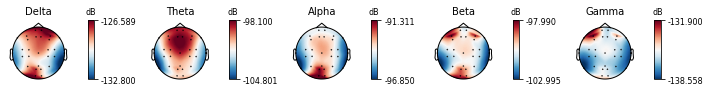

    Using multitaper spectrum estimation with 7 DPSS windows


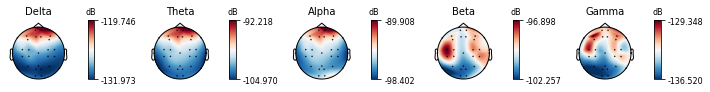

    Using multitaper spectrum estimation with 7 DPSS windows


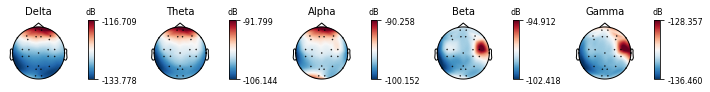

    Using multitaper spectrum estimation with 7 DPSS windows


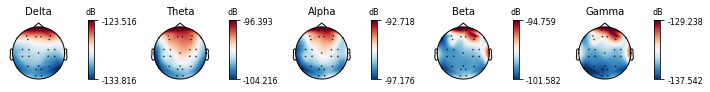

    Using multitaper spectrum estimation with 7 DPSS windows


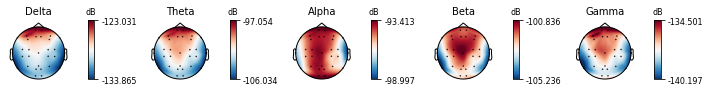

    Using multitaper spectrum estimation with 7 DPSS windows


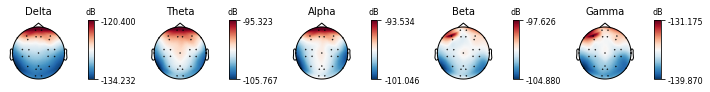

    Using multitaper spectrum estimation with 7 DPSS windows


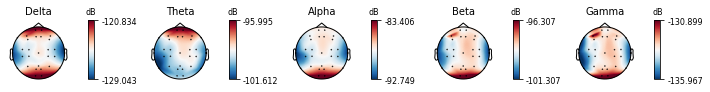

    Using multitaper spectrum estimation with 7 DPSS windows


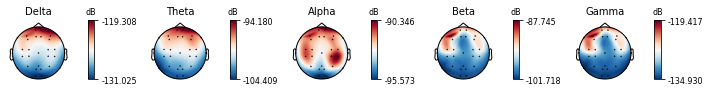

    Using multitaper spectrum estimation with 7 DPSS windows


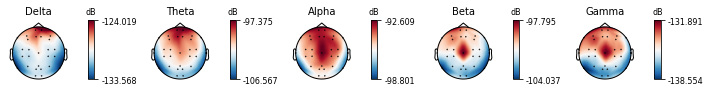

    Using multitaper spectrum estimation with 7 DPSS windows


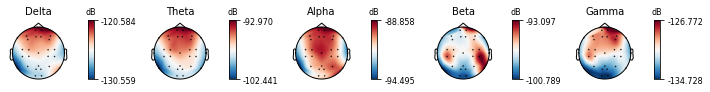

In [40]:
for i in range(29):
    test["subject{0}".format(i+1)].plot_psd_topomap()

In [42]:
# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs_train = {}
labels = {}

for i in range(29):
    epochs_train["subject{0}".format(i+1)] = test["subject{0}".format(i+1)].copy().crop(tmin=1, tmax=2)
    labels["subject{0}".format(i+1)] = test["subject{0}".format(i+1)].events[:, -1]

Computing rank from data with rank=None
    Using tolerance 6.4e-06 (2.2e-16 eps * 30 dim * 9.6e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-06 (2.2e-16 eps * 30 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6e-06 (2.2e-16 eps * 30 dim * 8.9e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-06 (2.2e-16 eps * 30 dim * 1.1e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 30 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


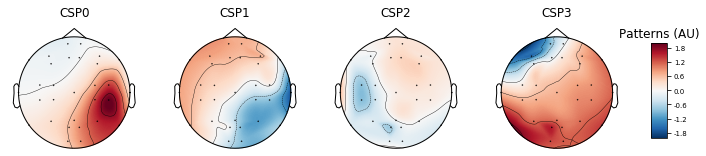

Computing rank from data with rank=None
    Using tolerance 8.3e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.8e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.2e-05 (2.2e-16 eps * 30 dim * 3.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


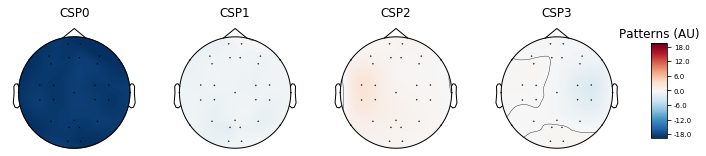

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.8e-06 (2.2e-16 eps * 30 dim * 1.5e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 30 dim * 4.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


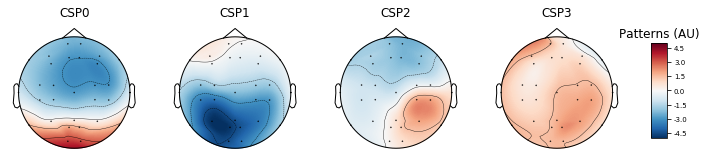

Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 30 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


    Using tolerance 3.3e-05 (2.2e-16 eps * 30 dim * 5e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.6e-05 (2.2e-16 eps * 30 dim * 5.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


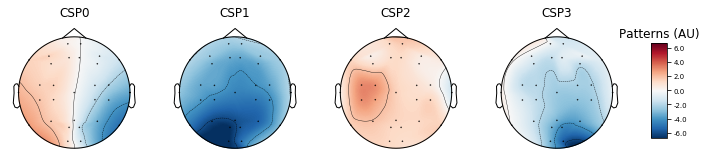

Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 30 dim * 4.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


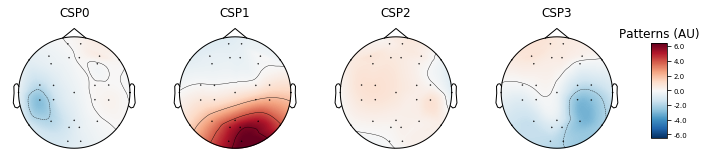

Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.5e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.4e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.7e-05 (2.2e-16 eps * 30 dim * 4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


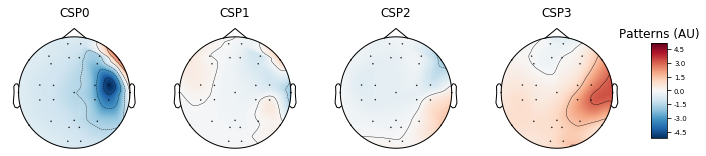

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 30 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 30 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 30 dim * 2.7e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.9e-05 (2.2e-16 eps * 30 dim * 5.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


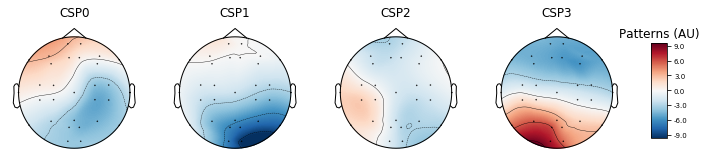

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 30 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


    Using tolerance 2.8e-05 (2.2e-16 eps * 30 dim * 4.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-05 (2.2e-16 eps * 30 dim * 4.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


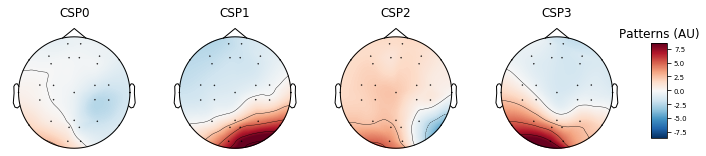

Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 30 dim * 2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.1e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.6e-05 (2.2e-16 eps * 30 dim * 5.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


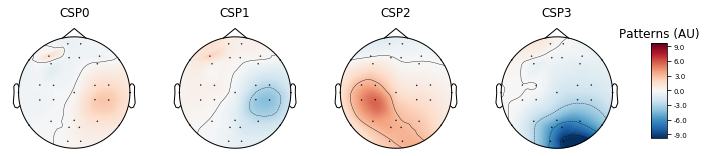

Computing rank from data with rank=None
    Using tolerance 9.1e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.3e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.3e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 30 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


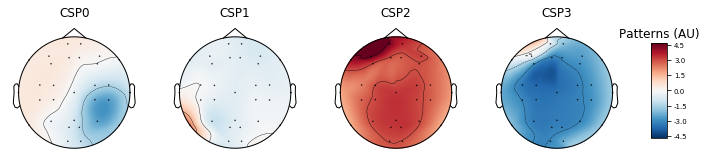

Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 30 dim * 5.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


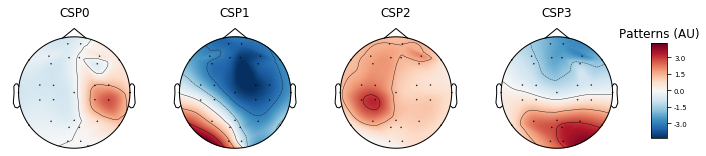

Computing rank from data with rank=None
    Using tolerance 5e-06 (2.2e-16 eps * 30 dim * 7.5e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.5e-06 (2.2e-16 eps * 30 dim * 6.7e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-06 (2.2e-16 eps * 30 dim * 7.4e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.6e-06 (2.2e-16 eps * 30 dim * 6.9e+08  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


    Using tolerance 1.3e-05 (2.2e-16 eps * 30 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 30 dim * 2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


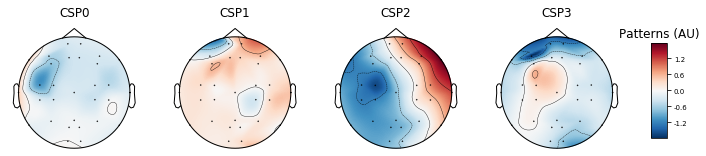

Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 30 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 30 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 30 dim * 5.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


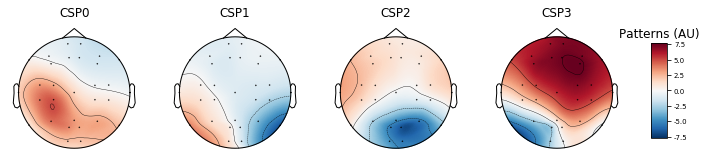

Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.5e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.1e-05 (2.2e-16 eps * 30 dim * 6.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


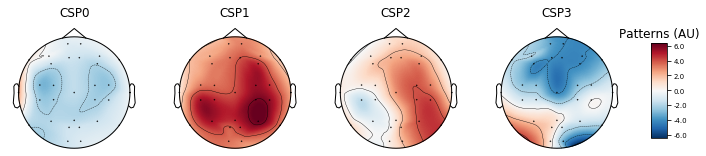

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.7e-05 (2.2e-16 eps * 30 dim * 4.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


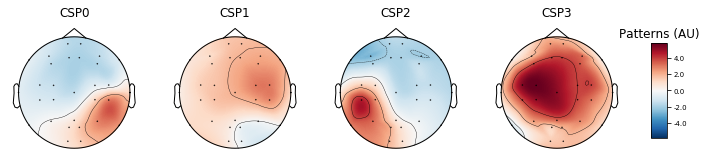

Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.1e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


    Using tolerance 3.4e-05 (2.2e-16 eps * 30 dim * 5.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 30 dim * 5.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


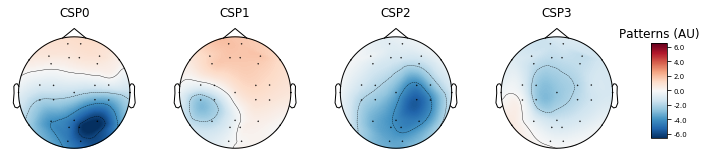

Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 30 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-05 (2.2e-16 eps * 30 dim * 2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


    Using tolerance 3.2e-05 (2.2e-16 eps * 30 dim * 4.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 30 dim * 5.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


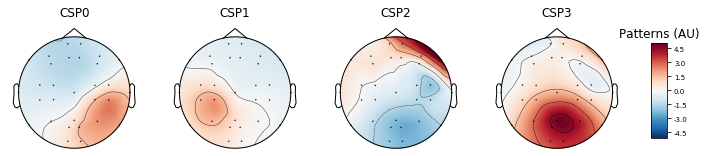

Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 30 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 30 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.4e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.1e-05 (2.2e-16 eps * 30 dim * 6.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


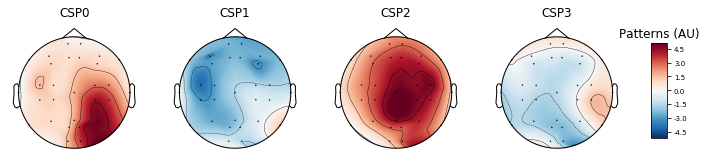

Computing rank from data with rank=None
    Using tolerance 7.4e-06 (2.2e-16 eps * 30 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-06 (2.2e-16 eps * 30 dim * 9.4e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Es

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-05 (2.2e-16 eps * 30 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


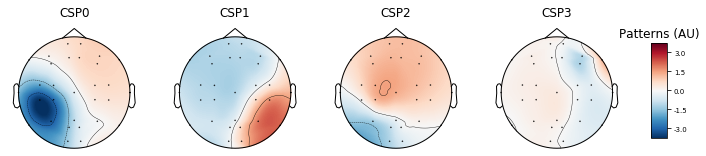

Computing rank from data with rank=None
    Using tolerance 8e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.2e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.8e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 30 dim * 3.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


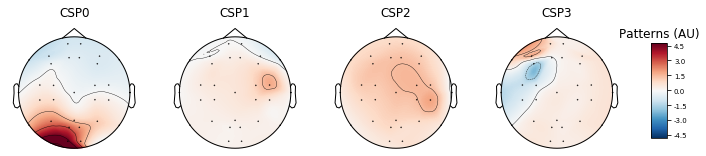

Computing rank from data with rank=None
    Using tolerance 7.4e-06 (2.2e-16 eps * 30 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.3e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 30 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


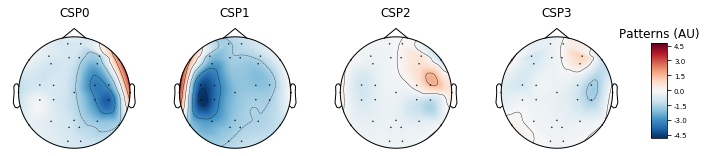

Computing rank from data with rank=None
    Using tolerance 7.8e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.8e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.5e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.2e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-05 (2.2e-16 eps * 30 dim * 3.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


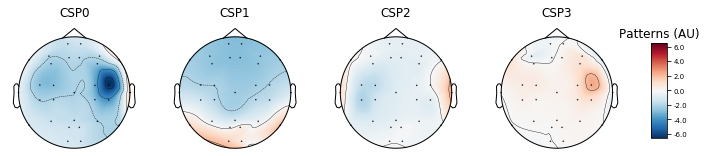

Computing rank from data with rank=None
    Using tolerance 8.8e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-05 (2.2e-16 eps * 30 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


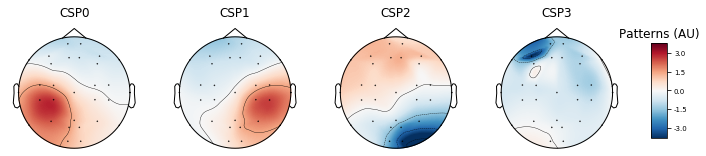

Computing rank from data with rank=None
    Using tolerance 7.4e-06 (2.2e-16 eps * 30 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.3e-06 (2.2e-16 eps * 30 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 30 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


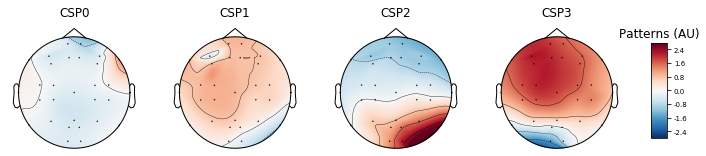

Computing rank from data with rank=None
    Using tolerance 6.5e-06 (2.2e-16 eps * 30 dim * 9.7e+08  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.8e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 30 dim * 1e+09  max singular value)
    Esti

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 30 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


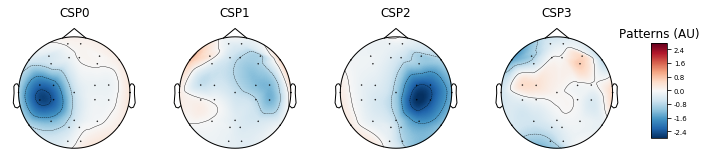

Computing rank from data with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 30 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3e-05 (2.2e-16 eps * 30 dim * 4.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


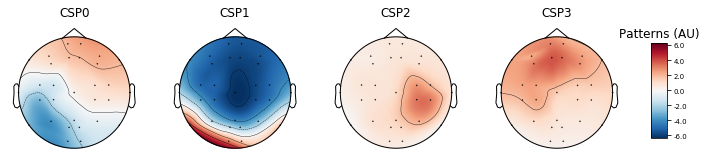

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.3e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-06 (2.2e-16 eps * 30 dim * 1.4e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.4e-05 (2.2e-16 eps * 30 dim * 3.6e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


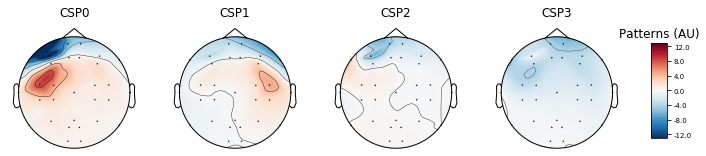

Computing rank from data with rank=None
    Using tolerance 8.6e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.8e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.5e-06 (2.2e-16 eps * 30 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.9e-06 (2.2e-16 eps * 30 dim * 1.2e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 30 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


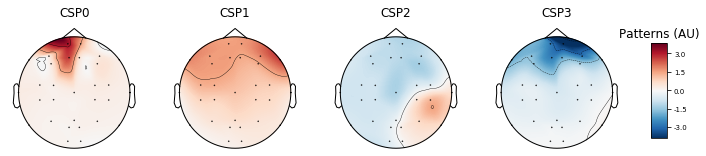

Computing rank from data with rank=None
    Using tolerance 2e-05 (2.2e-16 eps * 30 dim * 3e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 30 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 30 dim * 1.8e+09  max singular value)
    

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


    Using tolerance 3.1e-05 (2.2e-16 eps * 30 dim * 4.7e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 30 dim * 4.8e+09  max singular value)
    Estimated rank (mag): 30
    MAG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.


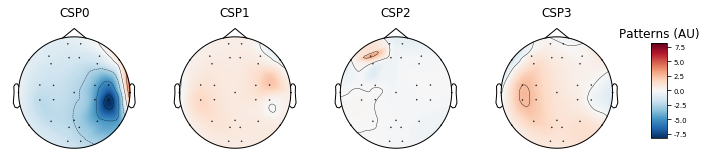

In [50]:
csp = {}
scores = {}
epochs_data = {}
epochs_data_train = {}
cv_split = {}
class_balance = {}
lda = {}
csp = {}
clf = {}

for i in range(29):
    # Define a monte-carlo cross-validation generator (reduce variance):
    scores["subject{0}".format(i+1)] = []
    epochs_data["subject{0}".format(i+1)] = test["subject{0}".format(i+1)].get_data()
    epochs_data_train["subject{0}".format(i+1)] = epochs_train["subject{0}".format(i+1)].get_data()
    cv = ShuffleSplit(10, test_size=0.2, random_state=42)
    cv_split["subject{0}".format(i+1)] = cv.split(epochs_data_train["subject{0}".format(i+1)])

    # Assemble a classifier
    lda["subject{0}".format(i+1)] = LinearDiscriminantAnalysis()
    csp["subject{0}".format(i+1)] = CSP(n_components=4, reg=None, log=True, norm_trace=False)

    # Use scikit-learn Pipeline with cross_val_score function
    clf["subject{0}".format(i+1)] = Pipeline([('CSP', csp["subject{0}".format(i+1)]), ('LDA', lda["subject{0}".format(i+1)])])
    scores["subject{0}".format(i+1)] = cross_val_score(clf["subject{0}".format(i+1)], epochs_data_train["subject{0}".format(i+1)], labels["subject{0}".format(i+1)], cv=cv, n_jobs=1)

    # Printing the results
    class_balance["subject{0}".format(i+1)] = np.mean(["subject{0}".format(i+1)] == labels["subject{0}".format(i+1)][0])
    class_balance["subject{0}".format(i+1)] = max(class_balance["subject{0}".format(i+1)], 1. - class_balance["subject{0}".format(i+1)])
    print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores["subject{0}".format(i+1)]),
                                                          class_balance["subject{0}".format(i+1)]))
    
    # plot CSP patterns estimated on full data for visualization
    csp["subject{0}".format(i+1)].fit_transform(epochs_data["subject{0}".format(i+1)], labels["subject{0}".format(i+1)])

    csp["subject{0}".format(i+1)].plot_patterns(test["subject{0}".format(i+1)].info, ch_type='eeg', units='Patterns (AU)', size=1.5)
    
